In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
np.random.seed(3)

In [155]:
## build a linear regresion class
class LinearRegression:
    def __init__(self):
        self.w = None
        self.b = None
        self.loss = []
        self.w_hist = []
        self.b_hist = []

    def fit(self, X, y, epochs=100, lr=0.01):
        print(X.shape)
        self.w = np.random.randn(X.shape[1])
        self.b = np.random.randn()

        for i in range(epochs):
            y_hat = self.predict(X)
            print(y_hat.shape)
            loss = np.mean((y_hat - y)**2)
            self.loss.append(loss)

            dw = np.mean((y_hat - y) * X, axis=0)
            db = np.mean(y_hat - y)

            self.w -= lr * dw
            self.b -= lr * db

            self.w_hist.append(self.w)
            self.b_hist.append(self.b)

    def predict(self, X):
        return X * self.w + self.b

    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("epochs")
        plt.ylabel("loss")
        plt.show()

    ##plot y=mx+b curve
    def plot_regression(self, X, y):
        plt.scatter(X, y)
        plt.plot(X, self.predict(X))
        plt.show()
        
    def plot_sgd(self,X, y):

        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        ax[0].scatter(X, y)
        ax[0].set_xlabel("X")
        ax[0].set_ylabel("y")
        ax[0].set_title("Data")

        ax[1].plot(self.loss)
        ax[1].set_xlabel("Epochs")
        ax[1].set_ylabel("Loss")
        ax[1].set_title("Loss")

        for i in range(len(self.w_hist)):
            ax[0].plot(X, self.w_hist[i] * X + self.b_hist[i], color="red", alpha=0.1)
    plt.show()


(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(100, 1)
(

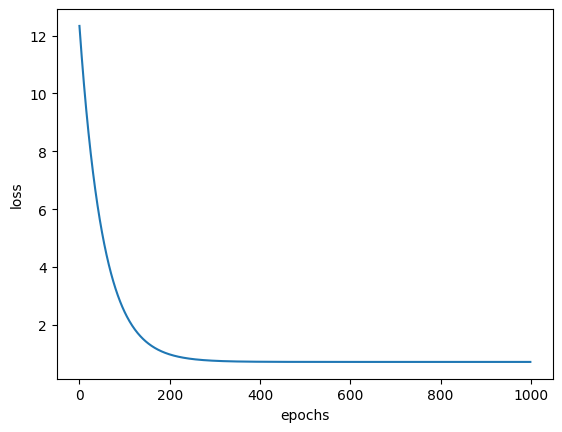

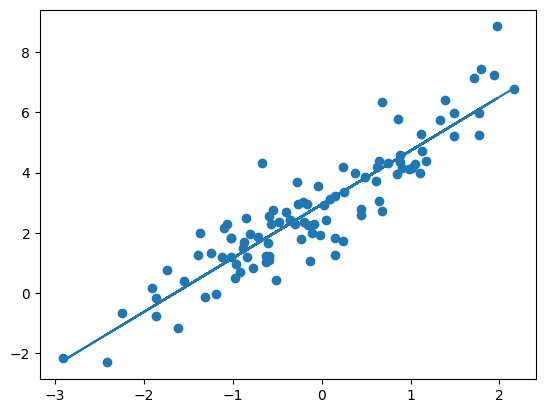

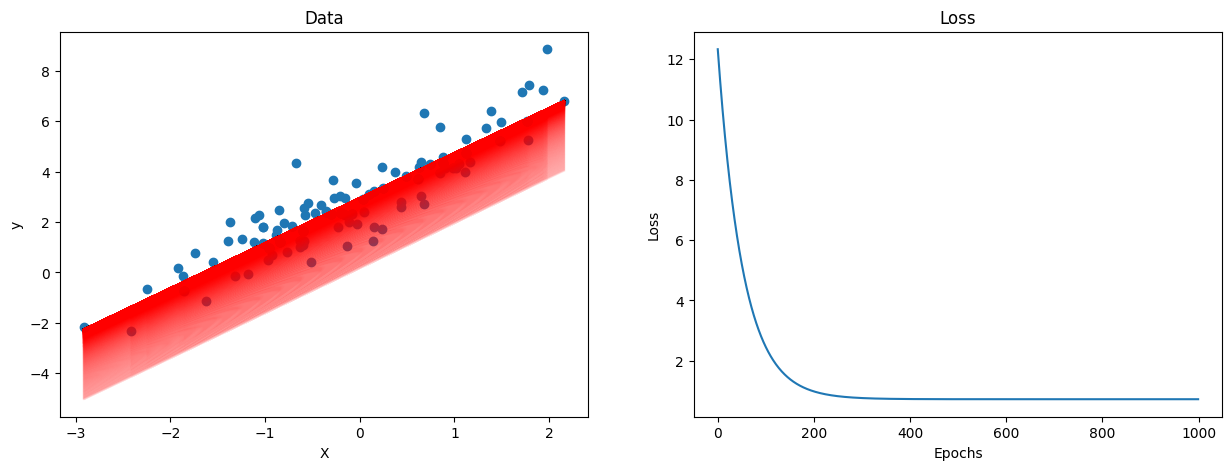

In [156]:
## build a dataset
X = np.random.randn(100, 1)
y = 2 * X + 3 + np.random.randn(100, 1)

## train the model
model = LinearRegression()
model.fit(X, y, epochs=1000, lr=0.01)

## plot the loss
model.plot_loss()

## plot the regression
model.plot_regression(X, y)

## predict
model.predict(np.array([[1]]))

## plot sGD
model.plot_sgd(X, y)

## save the model
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)



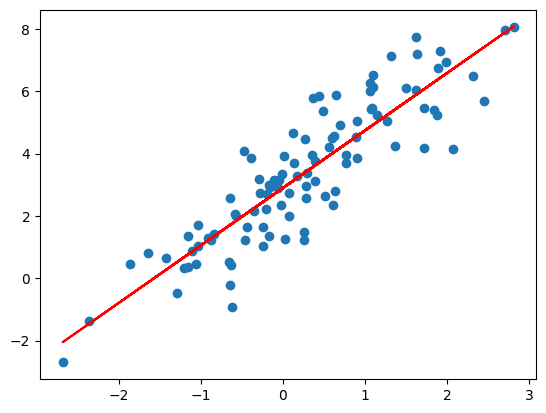

In [157]:
## linear regression using OLS method

class OLS:
    def __init__(self):
        self.w = None
        self.b = None

    def fit(self, X, y):
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.b = self.w[-1]
        self.w = self.w[:-1]

    def predict(self, X):
        return X @ self.w + self.b

    def plot_regression(self, X, y):
        plt.scatter(X, y)
        plt.plot(X, self.predict(X),color='red')
        plt.show()

## build a dataset
X = np.random.randn(100, 1)
y = 2 * X + 3 + np.random.randn(100, 1)

## train the model
model = OLS()
model.fit(X, y)

## plot the regression
model.plot_regression(X, y)


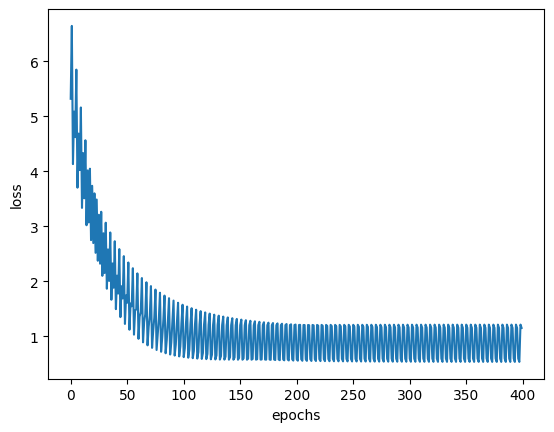

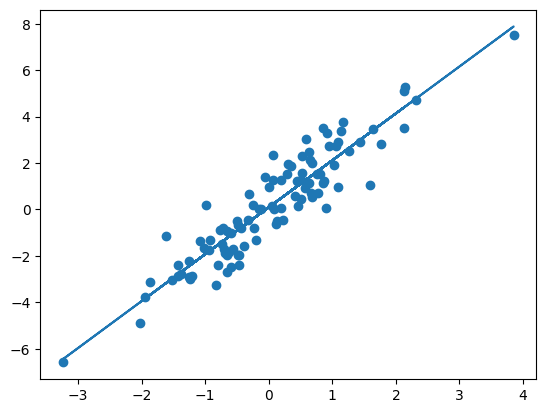

array([[2.11871932]])

In [159]:
## Linear Regression using mini batch

class MiniBatch:
    def __init__(self):
        self.w = None
        
        self.loss = []
        self.w_hist = []
       

    def fit(self, X, y, epochs=100, lr=0.01, batch_size=32):
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        self.w = np.random.randn(X.shape[1]).reshape(X.shape[1],1)
    
        

        for i in range(epochs):
            for j in range(0, X.shape[0], batch_size):
                X_batch = X[j : j + batch_size]
                y_batch = y[j : j + batch_size]

                y_hat = self.predict(X_batch)
                loss = np.mean((y_hat - y_batch)**2)
                self.loss.append(loss)

                dw = 2/batch_size *(X_batch.T @(y_hat - y_batch))
                

                self.w -= lr * dw
              
                self.w_hist.append(self.w)
                

    def predict(self, X):
        return X @ self.w

    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("epochs")
        plt.ylabel("loss")
        plt.show()

    ##plot y=mx+b curve
    def plot_regression(self, X, y):
        plt.scatter(X, y)
        plt.plot(X, self.predict(np.hstack((X, np.ones((X.shape[0], 1))))))
        plt.show()
        
    

## build a dataset
X = np.random.randn(100, 1)
y = np.array(list(map(lambda X : 2* X[0]+np.random.randn(),X))).reshape(-1,1)
# y = np.array(list(map(lambda X : 2* X[0]+ 3 *X[1]+5 +np.random.randn(),X))).reshape(-1,1)

## train the model
model = MiniBatch()
model.fit(X, y, epochs=100, lr=0.01)

## plot the loss
model.plot_loss()

## plot the regression
model.plot_regression(X, y)

## predict
model.predict(np.array([[1,1]]))





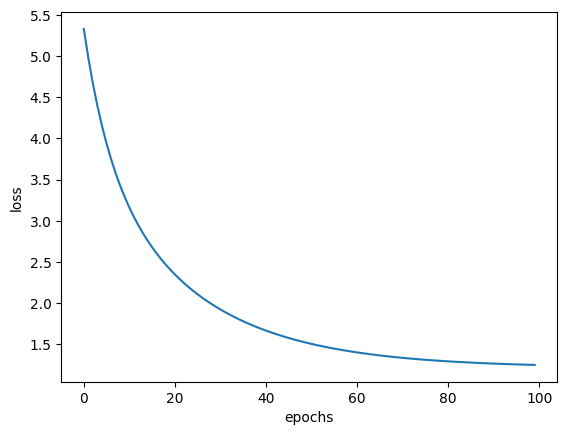

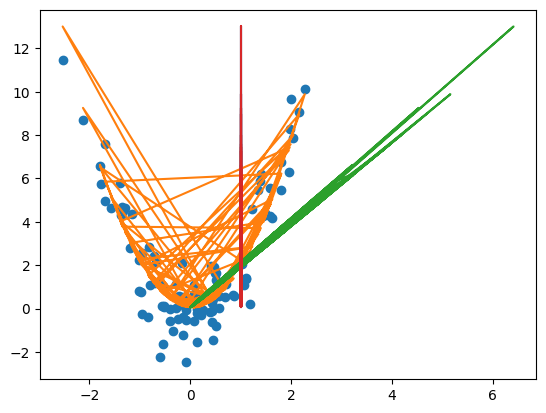

In [174]:
## Linear Regression using polynomial regression
from sklearn.preprocessing import PolynomialFeatures

class PolynomialRegression:
    def __init__(self):
        self.w = None
        self.p =None
        self.loss = []
        self.w_hist = []
       

    def fit(self, X, y, p, epochs=100, lr=0.01):
        self.p=p
        poly = PolynomialFeatures(self.p)
        X = poly.fit_transform(X)
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        self.w = np.random.randn(X.shape[1]).reshape(X.shape[1],1)
    
        

        for i in range(epochs):
            y_hat = self.predict(X)
            loss = np.mean((y_hat - y)**2)
            self.loss.append(loss)

            dw = 2/y.shape[0] *(X.T @(y_hat - y))
            self.w -= lr * dw
            self.w_hist.append(self.w)
                

    def predict(self, X):
        return X @ self.w

    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("epochs")
        plt.ylabel("loss")
        plt.show()

    ##plot y=mx+b curve
    def plot_regression(self, X, y):
        plt.scatter(X, y)
        poly = PolynomialFeatures(self.p)
        X = poly.fit_transform(X)
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        plt.plot(X, self.predict(X))
        plt.show()
        
    


## build a dataset
X = np.random.randn(100, 1)
y = np.array(list(map(lambda X : 2* X[0]**2+np.random.randn(),X))).reshape(-1,1)
# y = np.array(list(map(lambda X : 2* X[0]+ 3 *X[1]+5 +np.random.randn(),X))).reshape(-1,1)

## train the model
model = PolynomialRegression()
model.fit(X, y, p=2,epochs=100, lr=0.01)

## plot the loss
model.plot_loss()

## plot the regression
model.plot_regression(X, y)





